# Лабораторная работа №2

# Визуальный анализ данных

## Подключение библиотек

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

## Загрузка данных

In [2]:
data_path = 'iranian-churn.data.csv'
data = pd.read_csv(data_path)
data['Age Group'] = data['Age Group'].map({i: f'{i * 10}-{(i * 10) + 9}' for i in range(15)})  # Перевод возрастной группы в строку для дисректной категоризации
data['Tariff Plan'] = data['Tariff Plan'].map('{}'.format)  # Перевод тарифного плана в строку для дисректной категоризации
data.Complains = data.Complains.map(bool)  # перевод в булево значение, т.к это флаг
data.Status = data.Status.map({1: True, 2: False})  # перевод в булево значение, т.к это флаг
data.Churn = data.Churn.map(bool)  # перевод в булево значение, т.к это флаг
data.head(10)
# data.columns

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,False,38,0,4370,71,5,17,30-39,1,True,30,197.640,False
1,0,False,39,0,318,5,7,4,20-29,1,False,25,46.035,False
2,10,False,37,0,2453,60,359,24,30-39,1,True,30,1536.520,False
3,10,False,38,0,4198,66,1,35,10-19,1,True,15,240.020,False
4,3,False,38,0,2393,58,2,33,10-19,1,True,15,145.805,False
5,11,False,38,1,3775,82,32,28,30-39,1,True,30,282.280,False
6,4,False,38,0,2360,39,285,18,30-39,1,True,30,1235.960,False
7,13,False,37,2,9115,121,144,43,30-39,1,True,30,945.440,False
8,7,False,38,0,13773,169,0,44,30-39,1,True,30,557.680,False
9,7,False,38,1,4515,83,2,25,30-39,1,True,30,191.920,False


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Call  Failure            3150 non-null   int64  
 1   Complains                3150 non-null   bool   
 2   Subscription  Length     3150 non-null   int64  
 3   Charge  Amount           3150 non-null   int64  
 4   Seconds of Use           3150 non-null   int64  
 5   Frequency of use         3150 non-null   int64  
 6   Frequency of SMS         3150 non-null   int64  
 7   Distinct Called Numbers  3150 non-null   int64  
 8   Age Group                3150 non-null   object 
 9   Tariff Plan              3150 non-null   object 
 10  Status                   3150 non-null   bool   
 11  Age                      3150 non-null   int64  
 12  Customer Value           3150 non-null   float64
 13  Churn                    3150 non-null   bool   
dtypes: bool(3), float64(1), 

## Одиночные признаки

### Количественные признаки

In [4]:
data.columns

Index(['Call  Failure', 'Complains', 'Subscription  Length', 'Charge  Amount',
       'Seconds of Use', 'Frequency of use', 'Frequency of SMS',
       'Distinct Called Numbers', 'Age Group', 'Tariff Plan', 'Status', 'Age',
       'Customer Value', 'Churn'],
      dtype='object')

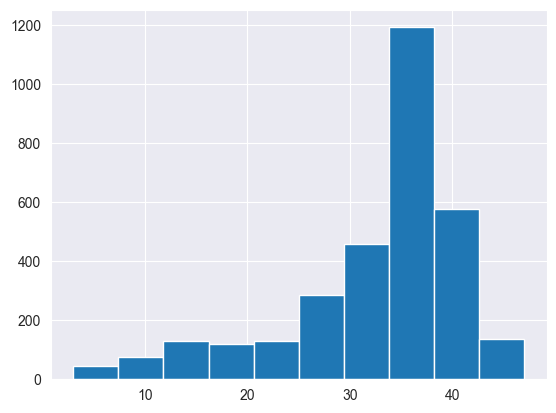

In [5]:
# Применение padnas для визуализации данных
# Pandas работает как настройка над matplotlib
data['Subscription  Length'].hist();  # гистограмма количества месяцев подписки пользователей

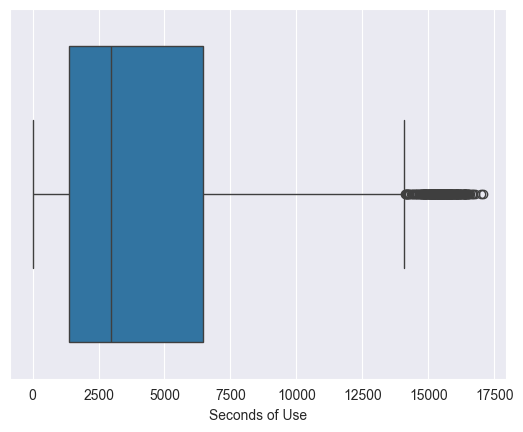

In [6]:
# использование Seaborn
# Построение диаграммы "ящик с усами"
sns.boxplot(data['Seconds of Use'], orient='y');  # диаграмма суммарного количества секунд звонков за год по каждому абоненту

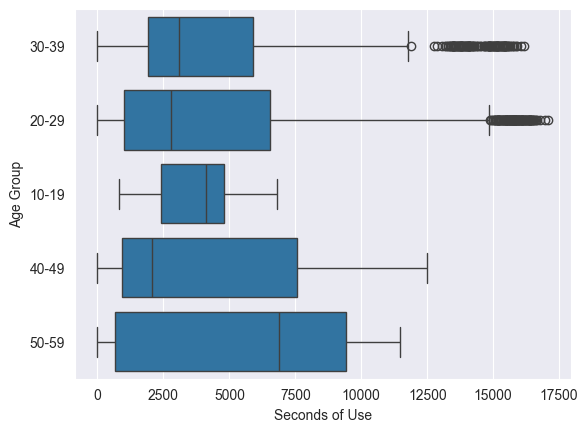

In [7]:
top_data = data[['Age Group','Seconds of Use']]
top_data = top_data.groupby('Age Group').sum()
top_data = top_data.sort_values('Seconds of Use',ascending=False)
top_data = top_data.index.values
sns.boxplot(y='Age Group', 
            x='Seconds of Use', 
            data=data[data['Age Group'].isin(top_data)]);

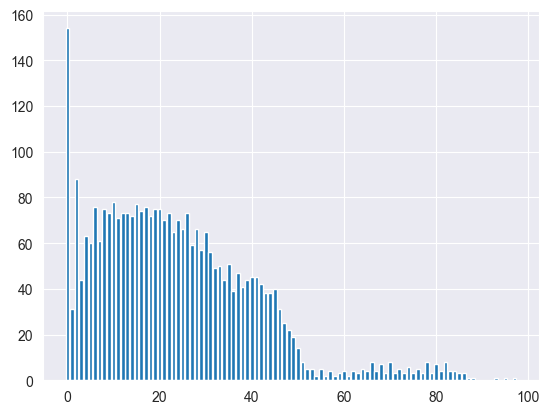

In [8]:
counts = data['Distinct Called Numbers'].value_counts()  # Уникальные звонки
plt.bar(counts.index, counts)
plt.show()

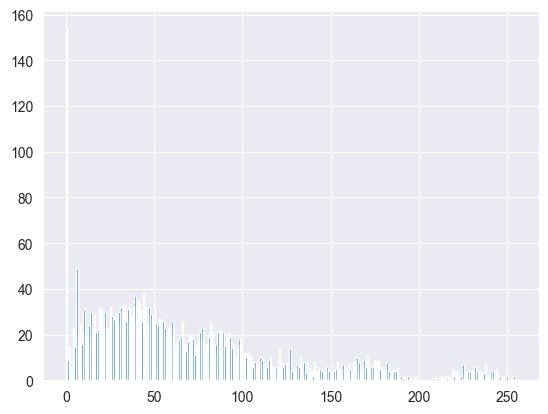

In [9]:
hist = data['Frequency of use'].value_counts()
plt.bar(hist.index, hist);

In [10]:
calls=[c for c in data.columns if 'call' in c.lower()] + ['Frequency of use']
calls

['Call  Failure', 'Distinct Called Numbers', 'Frequency of use']

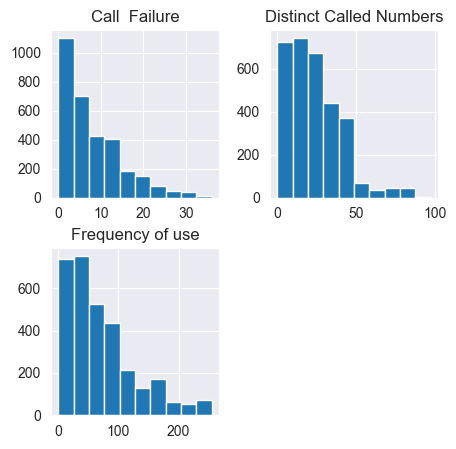

In [11]:
data[calls].hist(figsize=(5,5));  # гистаграмма для нескольких признаков (обзор распределения по звонкам и неудачным звонкам) 

## Категориальные признаки

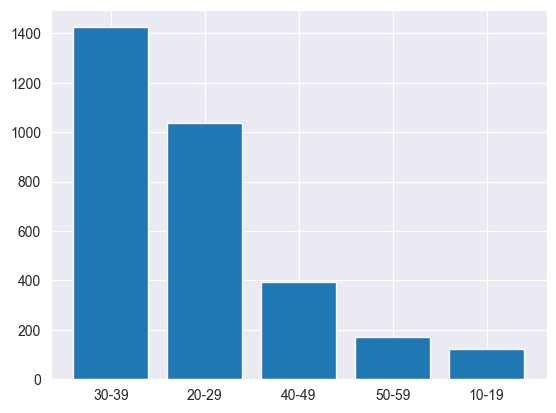

In [12]:
# определение самых популярных возрастных групп
hist = data['Age Group'].value_counts()
plt.bar(hist.index, hist);

In [13]:
# бинарный признак по Churn
data['Churn'].value_counts()

Churn
False    2655
True      495
Name: count, dtype: int64

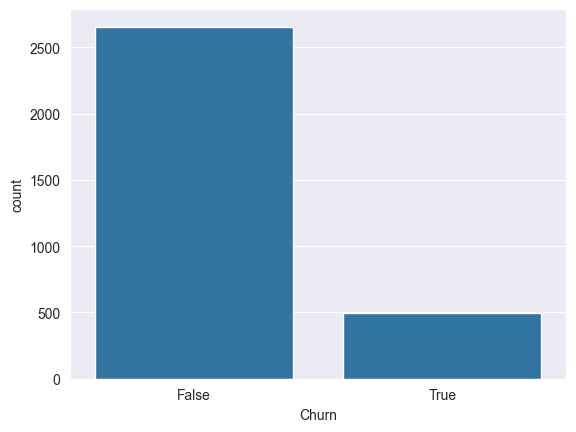

In [14]:
sns.countplot(x='Churn', data=data);

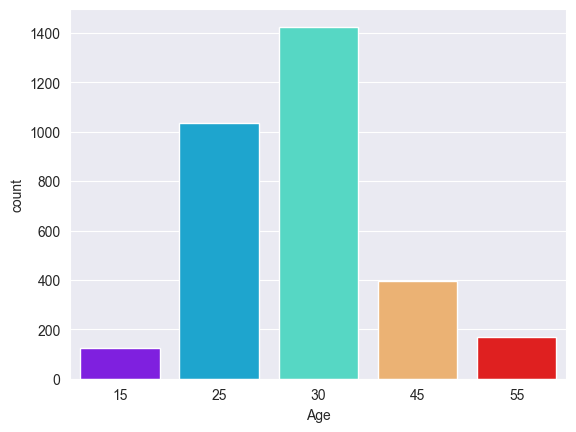

In [15]:
# гистограмма для всех возрастов
sns.countplot(x='Age', data=data, hue='Age', palette='rainbow', legend=False);

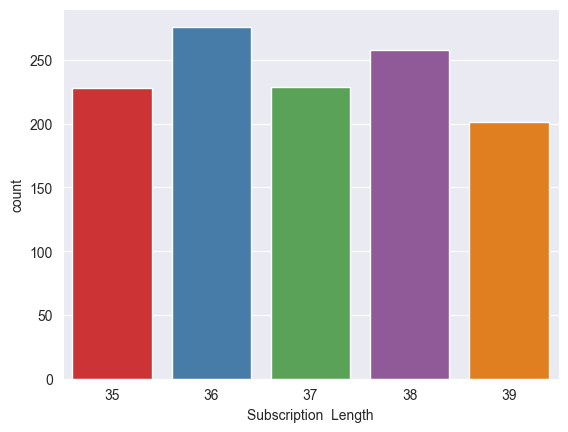

In [16]:
# гистограмма самых старых (по длине подписки) абонентов
most_common_subscribers = data['Subscription  Length'].value_counts().head(5).index
sns.countplot(x='Subscription  Length', data=data[data['Subscription  Length'].isin(most_common_subscribers)], hue='Subscription  Length', palette='Set1', legend=False);

## Взаимосвязанные признаки

### Количественный - количественный

In [17]:
# список колонок
data.columns

Index(['Call  Failure', 'Complains', 'Subscription  Length', 'Charge  Amount',
       'Seconds of Use', 'Frequency of use', 'Frequency of SMS',
       'Distinct Called Numbers', 'Age Group', 'Tariff Plan', 'Status', 'Age',
       'Customer Value', 'Churn'],
      dtype='object')

In [18]:
# Отбор числовых признаков по количеству и частоте звонков
calls=[c for c in data.columns if 'call' in c.lower()] + ['Frequency of use']
print(len(calls))
print(calls)

3
['Call  Failure', 'Distinct Called Numbers', 'Frequency of use']


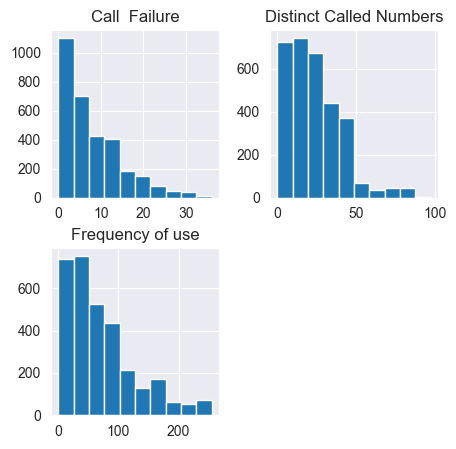

In [19]:
# отдельные гистограммы
data[calls].hist(figsize=(5,5));

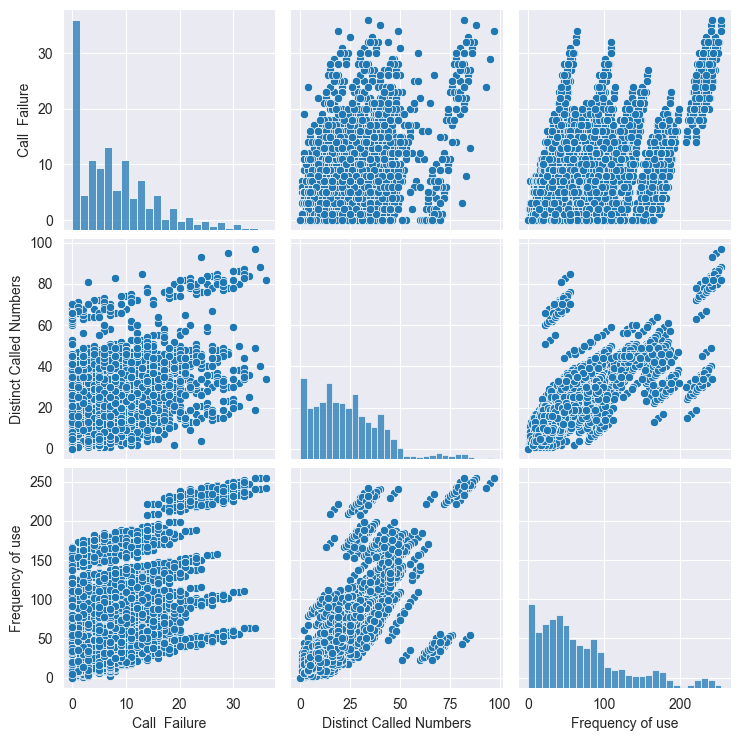

In [20]:
# Попарное распределение признаков
sns.pairplot(data[calls]);

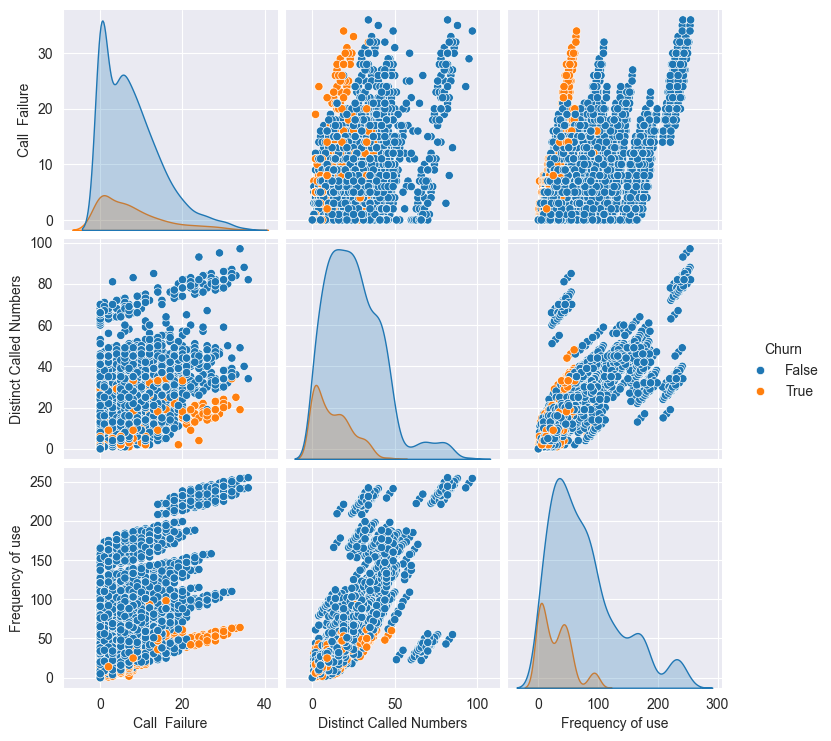

In [21]:
# распределение по ушедшим клиентам
sns.pairplot(data[calls + ['Churn']], hue='Churn');

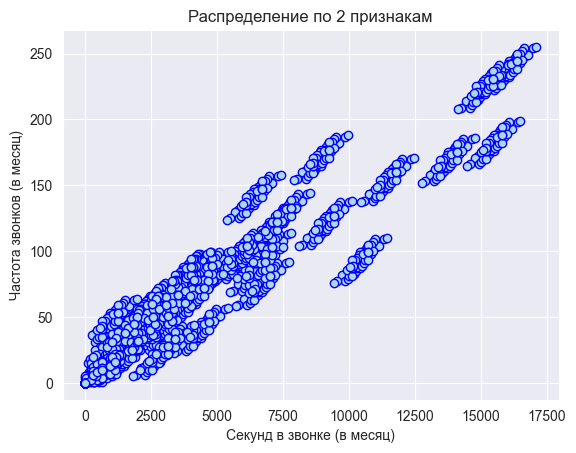

In [22]:
plt.scatter(data['Seconds of Use'],
            data['Frequency of use'],
            color='lightblue', edgecolors='blue')
plt.xlabel('Секунд в звонке (в месяц)')
plt.ylabel('Частота звонков (в месяц)')
plt.title('Распределение по 2 признакам');

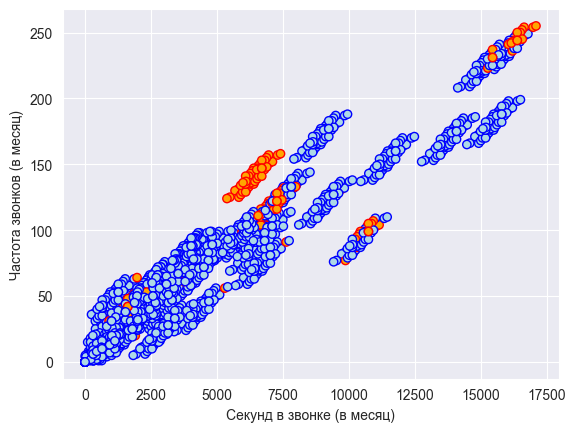

In [23]:
# Раскрашивание данных
# Цвет в зависимости от тарифа
c = data['Tariff Plan'].map({'1': 'lightblue', '2': "orange"})
edge_c = data['Tariff Plan'].map({'1': 'blue', '2': "red"})
plt.scatter(data['Seconds of Use'], data['Frequency of use'],
            color=c, edgecolors=edge_c)
plt.xlabel('Секунд в звонке (в месяц)')
plt.ylabel('Частота звонков (в месяц)');

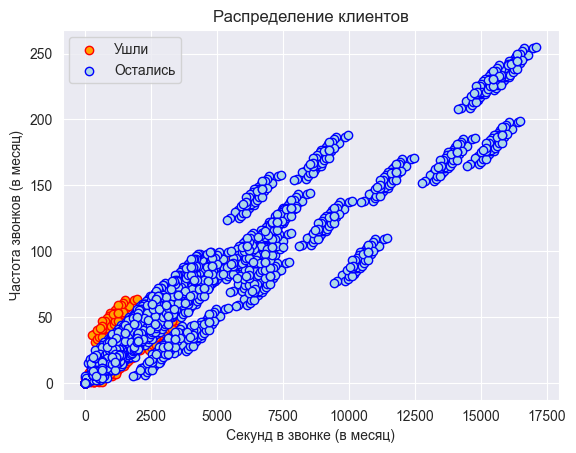

In [24]:
# Раскрашивание с легендой (по ушедшим)
data_churn = data[data['Churn']]
data_loyal = data[~data['Churn']]

plt.scatter(data_churn['Seconds of Use'],
            data_churn['Frequency of use'],
            color='orange', edgecolors='red',
            label='Ушли')
plt.scatter(data_loyal['Seconds of Use'],
            data_loyal['Frequency of use'],
            color='lightblue', edgecolors='blue',
            label='Остались')
plt.xlabel('Секунд в звонке (в месяц)')
plt.ylabel('Частота звонков (в месяц)')
plt.title('Распределение клиентов')
plt.legend();

### Корреляция признаков

In [25]:
# data['Age Group'] = data['Age Group'].map({f'{i * 10}-{(i * 10) + 9}': i for i in range(15)})  # возвращаем возрастные группы в числовые значения
data.corr(numeric_only=True)

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Status,Age,Customer Value,Churn
Call Failure,1.000000,0.152879,0.169737,0.589028,0.501607,0.573349,-0.022282,0.504058,0.114645,0.041758,0.121225,-0.008987
Complains,0.152879,1.000000,-0.020286,-0.033948,-0.104952,-0.090774,-0.111633,-0.058199,-0.271405,0.003298,-0.132895,0.532053
Subscription Length,0.169737,-0.020286,1.000000,0.078789,0.124618,0.106534,0.076318,0.092009,-0.142841,-0.002430,0.109565,-0.032588
Charge Amount,0.589028,-0.033948,0.078789,1.000000,0.446738,0.379096,0.091533,0.415198,0.356269,0.278955,0.169428,-0.202305
Seconds of Use,0.501607,-0.104952,0.124618,0.446738,1.000000,0.946489,0.102123,0.676536,0.460618,0.020843,0.415087,-0.298935
Frequency of use,0.573349,-0.090774,0.106534,0.379096,0.946489,1.000000,0.100019,0.736114,0.454752,-0.028350,0.401572,-0.303337
Frequency of SMS,-0.022282,-0.111633,0.076318,0.091533,0.102123,0.100019,1.000000,0.079650,0.296164,-0.092798,0.924877,-0.220754
Distinct Called Numbers,0.504058,-0.058199,0.092009,0.415198,0.676536,0.736114,0.079650,1.000000,0.413039,0.051037,0.284807,-0.278867
Status,0.114645,-0.271405,-0.142841,0.356269,0.460618,0.454752,0.296164,0.413039,1.000000,0.001312,0.412990,-0.498976
Age,0.041758,0.003298,-0.002430,0.278955,0.020843,-0.028350,-0.092798,0.051037,0.001312,1.000000,-0.220362,-0.017705


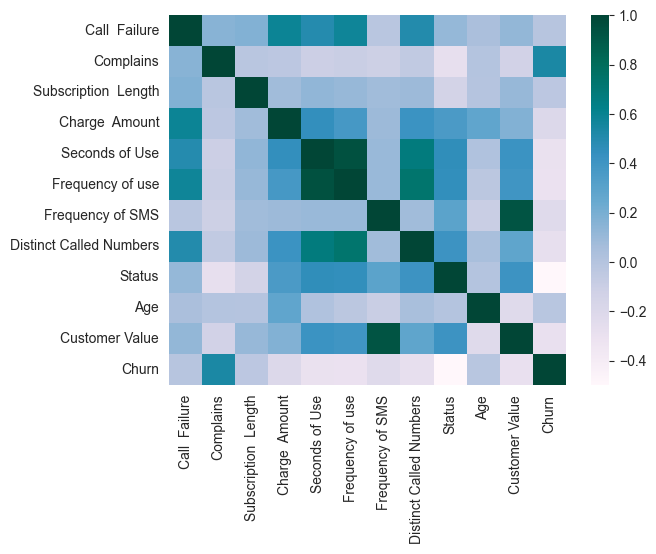

In [26]:
sns.heatmap(data.corr(numeric_only=True), cmap=plt.cm.PuBuGn);

Из карты heatmap видно, что довольно много признаков коррелирует: например сильная корреляция в парах (Customer Value, Frequency of SMS), (Seconds of Use, Frequency of use). Из таких пар можно удалить один признак

In [27]:
# Удаление коррелирующих признаков
data_uncorr = data.drop(
    ['Frequency of SMS', 'Status', 'Seconds of Use'] + calls, axis=1
)
data_uncorr.columns

Index(['Complains', 'Subscription  Length', 'Charge  Amount', 'Age Group',
       'Tariff Plan', 'Age', 'Customer Value', 'Churn'],
      dtype='object')

Перестраиваем heatmap без коррелирующих признаков

<Axes: >

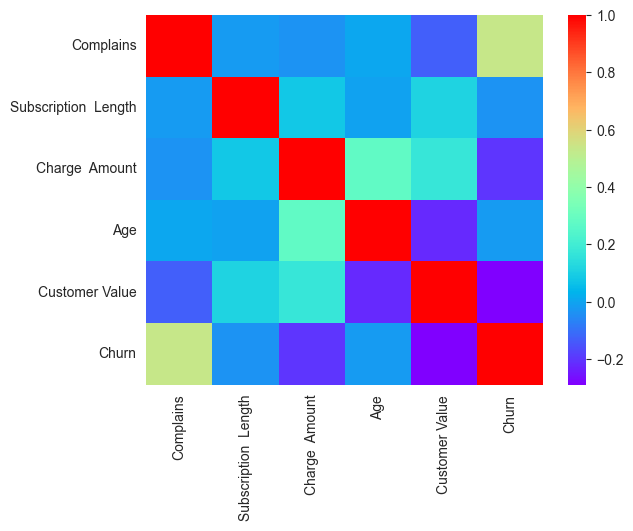

In [28]:
sns.heatmap(data_uncorr.corr(numeric_only=True), cmap=plt.cm.rainbow)